### Table of Experiments

#### exp1
- `nux = (2-10)`
- `gamma = [8-15]`
- `number of TRN Neurons = [500, 1000]`
-  No Additional supressional activity at 1000ms for 50ms

#### exp2
- `nux = (2-10)`
- `gamma = [8-15]`
- `number of TRN Neurons = [500, 1000]`
-  Additional supressional activity at 1000ms for 50ms

In [1]:
# To get the lastest pickle files run
! cat pullresults.sh

#!/bin/bash

rsync -auv hameed@login.inm.kfa-juelich.de:/users/hameed/simulenation/src/demyelination/data/ /home/hunaid/simulenation/src/demyelination/data/



In [1]:
import warnings
warnings.filterwarnings('ignore') # warnings are for the weak

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

import os
import sys
import re
import sys

In [3]:
sys.path.append("demyelination/") # we need this to successfully read pickle files

In [4]:
import fna

In [5]:
import pipeline as pipeline

In [6]:
def preparedf (dataobjs):
    # input dataframe
    # output organized data
    if len(dataobjs) == 0:
        raise Exception("No activity files found.")

    parts = dataobjs[0].spikeobj.keys()

    df = pd.DataFrame()

    for part in parts:
        for data in dataobjs:
            data.spikeobj[part].time_offset(250)
            tmp = data.params
            tmp = tmp.update({
                "brainPart" : part,
                "meanSpkRate" : data.spikeobj[part].mean_rate(),
                "pearsonCoeff" : data.metrics['pearsoncoeff'][part],
                "cvIsi" : data.spikeobj[part].cv_isi().mean()
            })
            df = df.append(data.params, ignore_index=True)

    #sortingParams = ["gamma", "nux"]
    #df = df.sort_values(by=sortingParams)

    return df

In [11]:

def makesubplot (data, fig, ax, attr):
    for axis, part in zip([0, 1], ["MGN", "TRN"]):
        d = data[ data["brainPart"] == part ].pivot_table(attr, "gamma", "wMGN")

        p = ax[axis].imshow(d, interpolation="nearest")
        fig.colorbar(p, ax=ax[axis])

        ax[axis].set_title(attr + " " + part)

        ax[axis].set_yticklabels(d.index.values)
        ax[axis].set_xticklabels(d.columns.values)

        ax[axis].set_ylabel("gamma")
        ax[axis].set_xlabel("wMGN")


## Exp1

In [16]:
files2 = pipeline.readfiles("demyelination/data/adex_burst_weights_wIn=0.9/activity/");
df2 = preparedf(files2);

In [18]:
df = df2

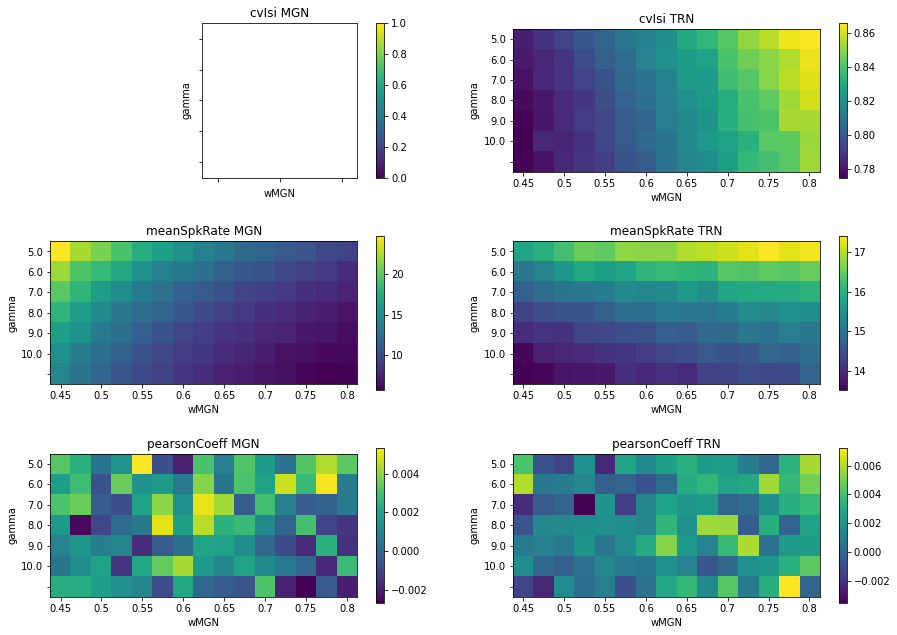

In [25]:
fig, ax = plt.subplots(nrows=3, ncols=2)

fig.set_size_inches(13, 9)
plt.subplots_adjust(left=0.01, right=0.03, top=0.03, bottom=0.02)

makesubplot(df, fig, ax[0], "cvIsi")

makesubplot(df, fig, ax[1], "meanSpkRate")

makesubplot(df, fig, ax[2], "pearsonCoeff")

fig.tight_layout()

plt.savefig("/home/pbr-student/Downloads/thesis-plot.pdf")

In [28]:
import pandas as pd
spk = pd.read_pickle("demyelination/data/adex_burst_weights_wIn=0.9/activity/spk_adex_burst_weights_wIn=0.9_nuX=3.5_nuX_stim=700.0_wX_TRN=0.05_wMGN=0.6_sigma_MGN=0.3_sigma_TRN=0.3_gamma=7.0")

In [87]:
def computeBurstSpikeRatio (spiketrain):
    spkdiff = np.diff(spiketrain)

    count = 0
    idx = 0

    while idx < len(spkdiff):
        # if this is the first spike then don't bother to check
        if idx == 0:
            idx += 1
            continue
        
        # was the last spike less than 50ms ago
        if spkdiff[idx-1] <= 50.:
            idx += 1
            continue

        # how many more burst spikes can we find?
        c = 1
        
        # is the next spike within 4ms
        if spkdiff[idx] <= 4.:
            # how many of the following spikes are within 8ms
            # we need at least 3 more for this to be a burst
            #print(spiketrain[idx])
            
            try:
                while spkdiff[idx+c] <= 8.:
                    #print(spiketrain[idx+c])
                    c += 1

                if c >= 4:
                    count += c
                    idx += c
                    continue # restart the loop
            except:
                pass
        
        idx += 1

    return count

def computePopulationBurstSpikeRatio (population):
    k = population.spiketrains.keys()
    
    return [computeBurstSpikeRatio(population.spiketrains[_].spike_times) for _ in k]

#computeBurstSpikeRatio(spk.spikeobj['MGN'].spiketrains[500.0].spike_times)
#computePopulationBurstSpikeRatio(spk.spikeobj['MGN'])

In [88]:
np.mean(computePopulationBurstSpikeRatio(spk.spikeobj['MGN'])), np.mean(computePopulationBurstSpikeRatio(spk.spikeobj['TRN']))

(2.76, 0.0)

dict_keys([1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 112.0, 113.0, 114.0, 115.0, 116.0, 117.0, 118.0, 119.0, 120.0, 121.0, 123.0, 124.0, 125.0, 126.0, 127.0, 128.0, 130.0, 131.0, 132.0, 133.0, 134.0, 135.0, 136.0, 137.0, 138.0, 139.0, 140.0, 141.0, 142.0, 143.0, 144.0, 145.0, 146.0, 147.0, 148.0, 149.0, 150.0, 151.0, 152.0, 153.0, 154.0, 155.0, 156.0, 157.0, 158.0, 159.0, 160.0, 16

In [54]:
np.diff(spk.spikeobj['MGN'].spiketrains[500.0].spike_times)

array([ 58.1      ,   2.899994 ,  39.200012 ,  49.199997 ,  72.8      ,
        11.       ,   2.5      ,   8.699982 ,   4.100006 , 157.80002  ,
         9.599976 ,  48.100037 ,   6.3999634,   4.5      ,  83.       ,
        22.       ,  94.29999  , 272.80005  ,  40.599976 ,   1.5999756,
        20.099976 ,   4.4000244, 173.30005  ,   6.4000244, 160.29993  ,
        90.       ,   1.4000244,   1.5      ,   1.3000488,   2.2999268,
         4.2000732, 313.5      ,  11.699951 ,  13.599976 ,   2.8000488,
        48.900024 ,   3.5      , 106.09985  ,  44.80005  , 165.19995  ,
        23.800049 ,   4.800049 ,   2.8999023,  13.       ,   7.1000977,
         8.899902 ,  33.200195 , 151.7998   ,  35.5      ,  13.600098 ,
        39.30005  ,  84.       ,   5.0998535,  37.700195 , 123.299805 ,
        77.80005  ,  79.80005  ,   5.3999023,  85.       , 139.2002   ,
        37.69995  ,  98.09985  ,   4.       ,  67.90015  ,  33.69995  ,
         3.       ,   2.1000977,  12.       ,  89.8999   ,  25.3

In [57]:
spk.spikeobj['MGN'].spiketrains[500.0].spike_times

array([  96.4,  154.5,  157.4,  196.6,  245.8,  318.6,  329.6,  332.1,
        340.8,  344.9,  502.7,  512.3,  560.4,  566.8,  571.3,  654.3,
        676.3,  770.6, 1043.4, 1084. , 1085.6, 1105.7, 1110.1, 1283.4,
       1289.8, 1450.1, 1540.1, 1541.5, 1543. , 1544.3, 1546.6, 1550.8,
       1864.3, 1876. , 1889.6, 1892.4, 1941.3, 1944.8, 2050.9, 2095.7,
       2260.9, 2284.7, 2289.5, 2292.4, 2305.4, 2312.5, 2321.4, 2354.6,
       2506.4, 2541.9, 2555.5, 2594.8, 2678.8, 2683.9, 2721.6, 2844.9,
       2922.7, 3002.5, 3007.9, 3092.9, 3232.1, 3269.8, 3367.9, 3371.9,
       3439.8, 3473.5, 3476.5, 3478.6, 3490.6, 3580.5, 3605.9, 3687.6,
       3692.7, 3742.1, 3802.1, 3805. , 3937.4, 4028.9, 4033. , 4181.1,
       4217. , 4219.1, 4262.1, 4343.1, 4452.5, 4455. , 4458.9, 4602.3,
       4610.9, 4613.1, 4615.8, 4621.5, 4689.6, 4862.3, 4879.5, 4970.6,
       4975. ], dtype=float32)

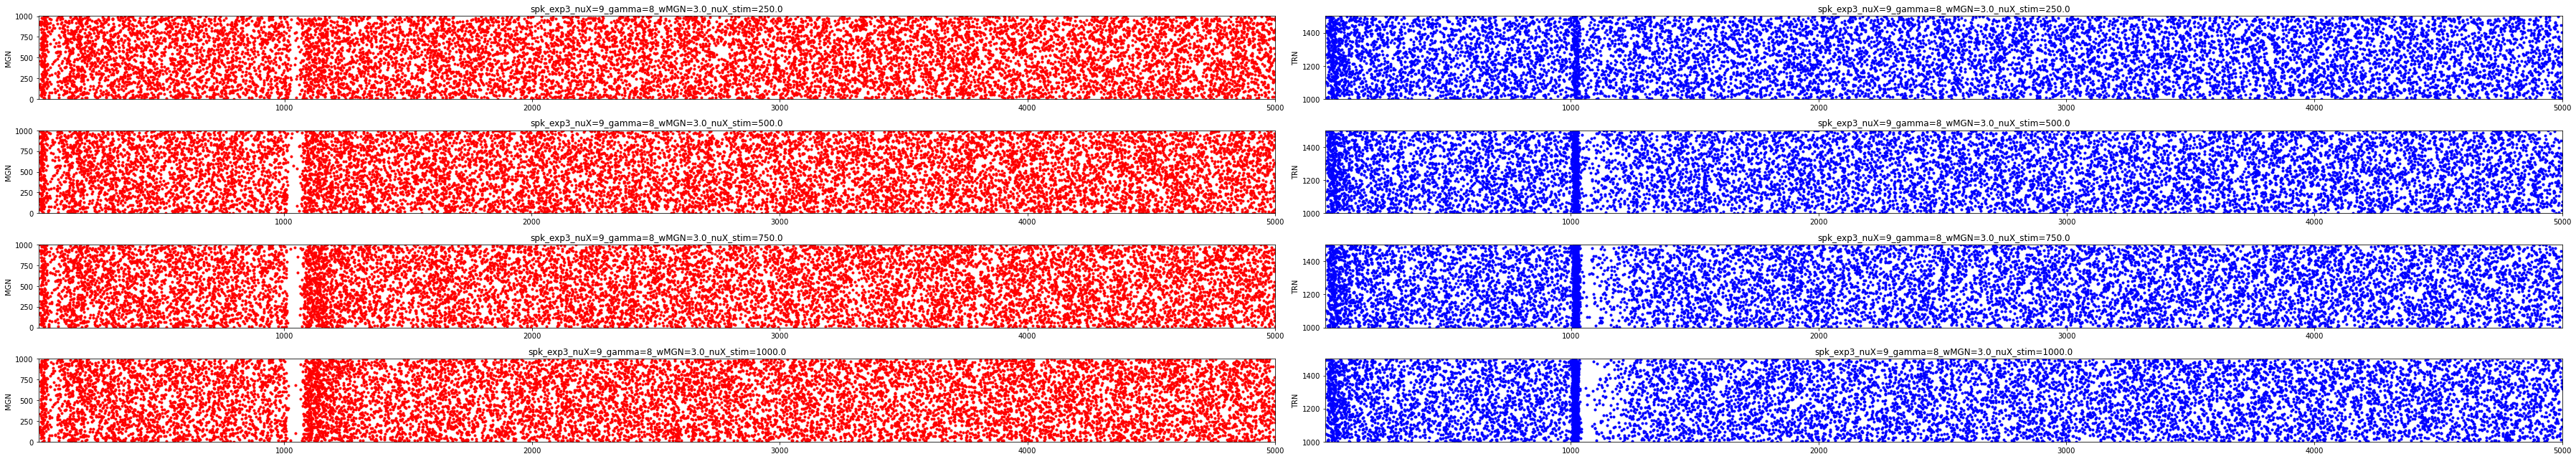

In [21]:
fls = [
    "spk_exp3_nuX=9_gamma=8_wMGN=3.0_nuX_stim=250.0",
    "spk_exp3_nuX=9_gamma=8_wMGN=3.0_nuX_stim=500.0",
    "spk_exp3_nuX=9_gamma=8_wMGN=3.0_nuX_stim=750.0",
    "spk_exp3_nuX=9_gamma=8_wMGN=3.0_nuX_stim=1000.0",
    ]

fig, ax = plt.subplots(nrows=len(fls), ncols=2)

for idx, fl in enumerate(fls):
    d = pd.read_pickle("demyelination/data/exp3/activity/" + fl)

    fig.set_size_inches(50, 9)
    #plt.subplots_adjust(left=0.01, right=0.03, top=0.03, bottom=0.02)

    for axis, part in zip([0, 1], d.spikeobj.keys()):
        clr = 'red' if part == 'MGN' else 'blue'
    
        d.spikeobj[part].raster_plot(ax=ax[idx][axis], dt=10, display=False, color=clr)
        ax[idx][axis].set_ylabel(part)
        ax[idx][axis].set_title(fl)

fig.tight_layout()

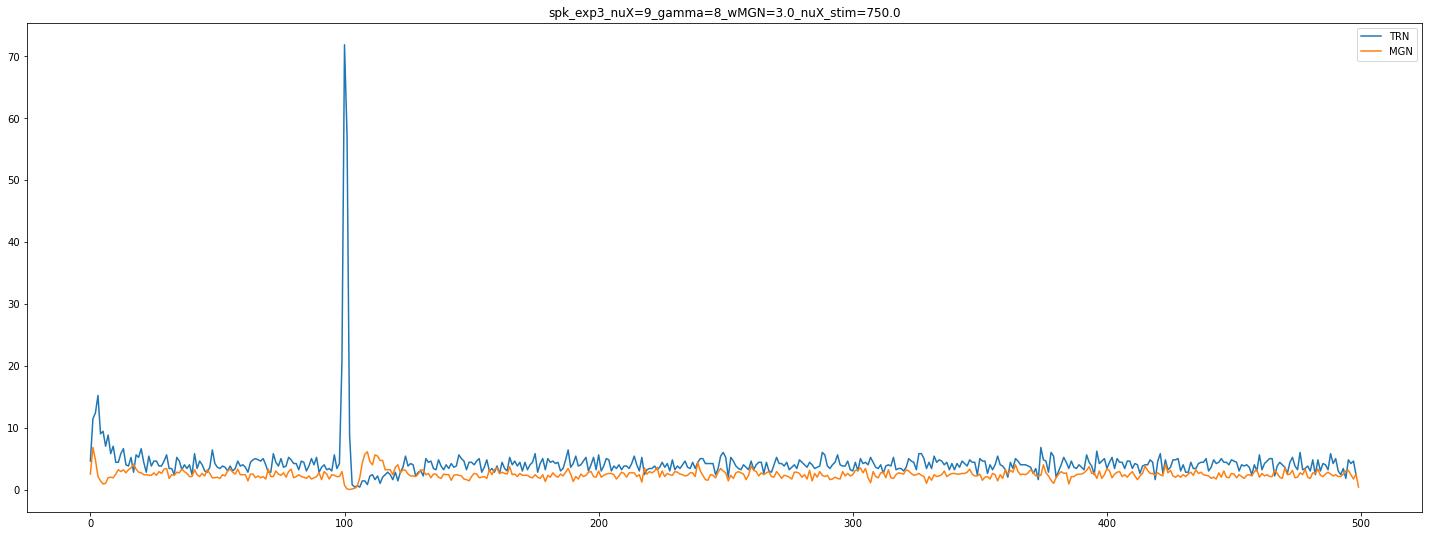

In [30]:
fl = 'spk_exp3_nuX=9_gamma=8_wMGN=3.0_nuX_stim=750.0'
p = pd.read_pickle("demyelination/data/exp3/activity/" + fl)

fig, ax = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches(25, 9)

#p.spikeobj['MGN'].firing_rate(10, average=True)
ax.plot(p.spikeobj['TRN'].firing_rate(10, average=True), label='TRN')
ax.plot(p.spikeobj['MGN'].firing_rate(10, average=True), label='MGN')

plt.title(fl)

ax.legend()


In [81]:
#! ls demyelination/data/exp3/activity/
#| grep -E nuX=15

## Last Know Good Configuration

In [42]:
! pwd

/home/hunaid/simulenation/src


In [60]:
ax[1]

<AxesSubplot:>

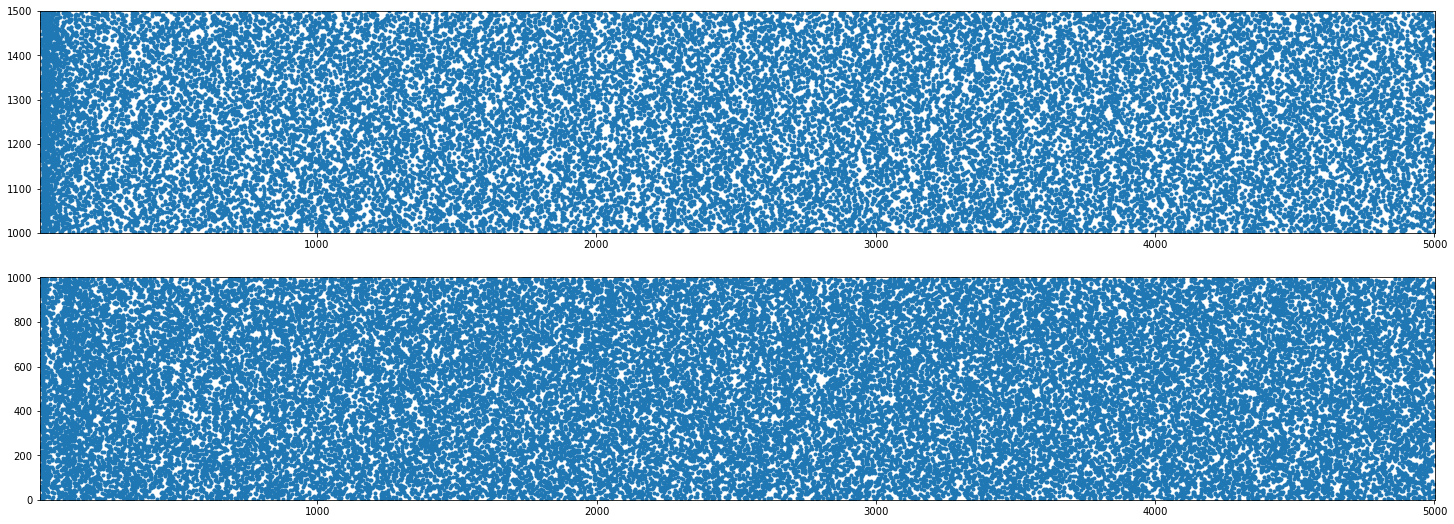

In [71]:
p = pd.read_pickle("demyelination/data/exp1/activity/spk_exp1_nuX=12_gamma=4_nTRN=500")

fig, ax = plt.subplots(nrows=2, ncols=1)
fig.set_size_inches(25, 9)

p.spikeobj['TRN'].raster_plot(ax=ax[0], display=False)
p.spikeobj['MGN'].raster_plot(ax=ax[1], display=False)

plt.show()

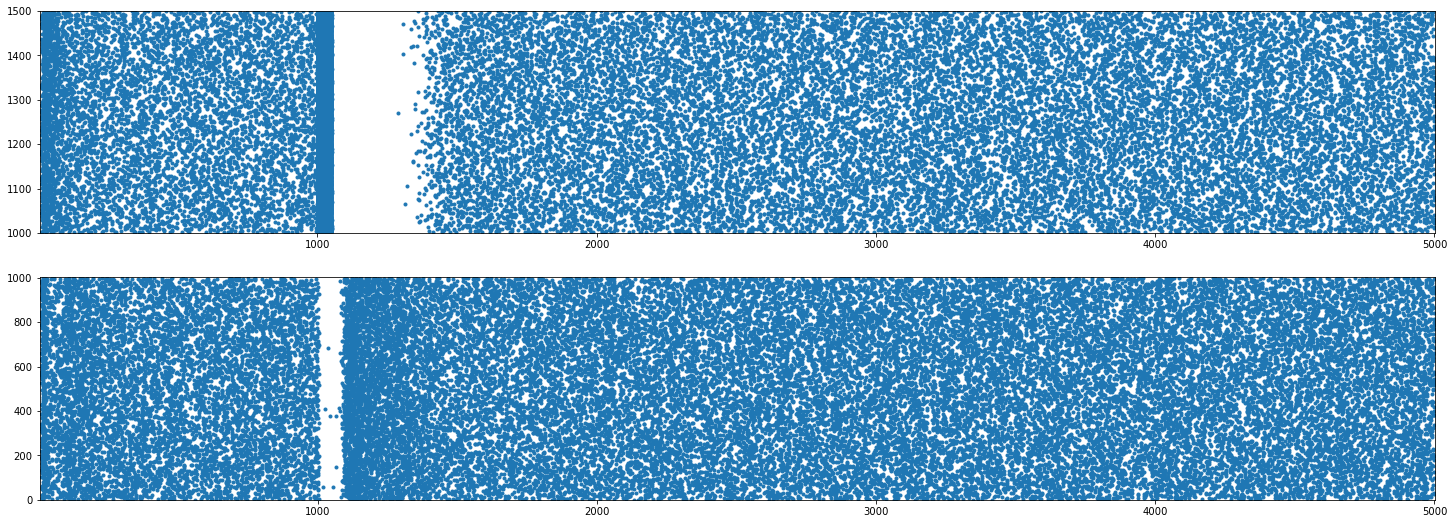

In [72]:
p = pd.read_pickle("demyelination/data/exp2/activity/spk_exp2_nuX=12_gamma=4_nTRN=500")

fig, ax = plt.subplots(nrows=2, ncols=1)
fig.set_size_inches(25, 9)

p.spikeobj['TRN'].raster_plot(ax=ax[0], display=False)
p.spikeobj['MGN'].raster_plot(ax=ax[1], display=False)

plt.show()

In [79]:

# fig, ax = plt.subplots(nrows=1, ncols=1)
# fig.set_size_inches(25, 9)

# ax.plot(p.spikeobj['TRN'].firing_rate(5000))
# ax.plot(p.spikeobj['MGN'].firing_rate(5000))
